In [53]:
import tensorflow as tf
import numpy as np
import mnist
import matplotlib.pyplot as plt
from utils import *

In [54]:

def create_model():
    model = tf.keras.Sequential(
    [
        # tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1)),
        
        # tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same'),
        # tf.keras.layers.BatchNormalization(center=True, scale=False),
        # tf.keras.layers.Activation('relu'),
        
        # tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
        # tf.keras.layers.BatchNormalization(center=True, scale=False),
        # tf.keras.layers.Activation('relu'),
        
        # tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
        # tf.keras.layers.BatchNormalization(center=True, scale=False),
        # tf.keras.layers.Activation('relu'),
        
        # tf.keras.layers.Flatten(),
        
        # tf.keras.layers.Dense(200, use_bias=False),
        # tf.keras.layers.BatchNormalization(center=True, scale=False),
        # tf.keras.layers.Activation('relu'),
        
        # tf.keras.layers.Dropout(0.3),
        # tf.keras.layers.Dense(10, activation='softmax')
        
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(60, activation='relu'),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model
model = create_model()
# print model layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 60)                6060      
                                                                 
 dropout_8 (Dropout)         (None, 60)                0         
                                                                 
 dense_11 (Dense)            (None, 10)               

# Using our own dataset

In [55]:
from sklearn.model_selection import train_test_split
X,y = get_data()
X = X.reshape(-1, 28*28)
train_digit,test_digit, train_label, test_label = train_test_split(X,y, test_size=0.1, random_state=42)
[tmp.shape for tmp in [train_digit, train_label,test_digit, test_label]]

[(992, 784), (992,), (111, 784), (111,)]

In [56]:
train_label = tf.one_hot(train_label,10)
test_label = tf.one_hot(test_label,10)

TRAIN_SIZE = len(train_digit)
EPOCHS = 10
steps_per_epoch = TRAIN_SIZE//EPOCHS
BATCH_SIZE  = TRAIN_SIZE//steps_per_epoch

print("Steps per epoch: ", steps_per_epoch)
history = model.fit(x = train_digit, y = train_label , steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=(test_digit, test_label), validation_steps=1)
model.save('saved_model/local_model')

Steps per epoch:  99
Epoch 1/10
99/99 [==============================] - 2s 7ms/step - loss: 20.5695 - accuracy: 0.3444 - val_loss: 4.0370 - val_accuracy: 0.6396
Epoch 2/10
99/99 [==============================] - 1s 7ms/step - loss: 4.7628 - accuracy: 0.5926 - val_loss: 2.8982 - val_accuracy: 0.7207
Epoch 3/10
99/99 [==============================] - 1s 5ms/step - loss: 2.9409 - accuracy: 0.6731 - val_loss: 2.0693 - val_accuracy: 0.7838
Epoch 4/10
99/99 [==============================] - 0s 4ms/step - loss: 2.1802 - accuracy: 0.7139 - val_loss: 1.6507 - val_accuracy: 0.7838
Epoch 5/10
99/99 [==============================] - 0s 5ms/step - loss: 1.5500 - accuracy: 0.8009 - val_loss: 0.9991 - val_accuracy: 0.8288
Epoch 6/10
99/99 [==============================] - 0s 4ms/step - loss: 1.2962 - accuracy: 0.8028 - val_loss: 1.0217 - val_accuracy: 0.8378
Epoch 7/10
99/99 [==============================] - 0s 4ms/step - loss: 0.8864 - accuracy: 0.8306 - val_loss: 1.4147 - val_accuracy: 0.837

99/99 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.8850 - val_loss: 0.9646 - val_accuracy: 0.8288


INFO:tensorflow:Assets written to: saved_model/local_model\assets


INFO:tensorflow:Assets written to: saved_model/local_model\assets


4/4 [==============================] - 0s 2ms/step


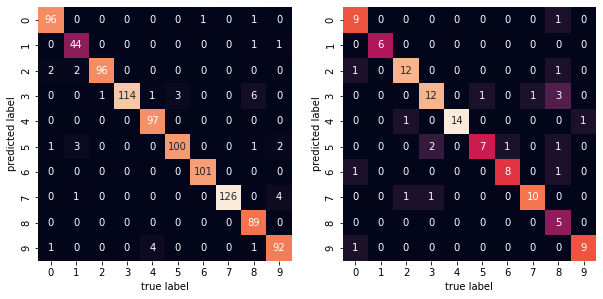

In [57]:
_, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
pred = inverse_one_hot(model.predict(train_digit))
plot_confusion_matrix(inverse_one_hot(train_label), pred, axs[0])
pred = inverse_one_hot(model.predict(test_digit))
plot_confusion_matrix(inverse_one_hot(test_label), pred, axs[1])

# MNIST

In [59]:
RUN_MNIST = False
if RUN_MNIST:
    model = create_model()
    train_digit, train_label = mnist.extract_train()
    test_digit, test_label = mnist.extract_test()
    train_digit = train_digit.reshape(-1,28*28)
    test_digit = test_digit.reshape(-1,28*28)

    train_label = tf.one_hot(train_label, 10)
    test_label = tf.one_hot(test_label, 10)
    print([tmp.shape for tmp in [train_digit, train_label, test_digit, test_label]])

    TRAIN_SIZE = len(train_digit)
    BATCH_SIZE = 128
    EPOCHS = 10
    steps_per_epoch = TRAIN_SIZE//BATCH_SIZE  # 60,000 items in this dataset


    print("Steps per epoch: ", steps_per_epoch)
    history = model.fit(x = train_digit, y = train_label , steps_per_epoch=steps_per_epoch, 
                        epochs=EPOCHS,
                        validation_data=(test_digit, test_label), validation_steps=1)
    model.save('saved_model/googler_model')

35/35 [==============================] - 0s 3ms/step


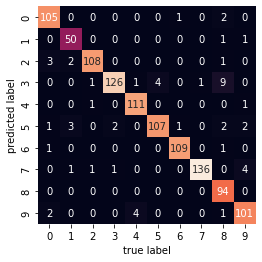

In [65]:
digits, labels = get_data()
digits = digits.reshape(-1,28*28)

pred = model.predict(digits)
pred = inverse_one_hot(pred)

res = pred == labels
acc = res[res].sum() / res.shape[0] * 100
acc
plot_confusion_matrix(labels, pred)

313/313 [==============================] - 1s 2ms/step


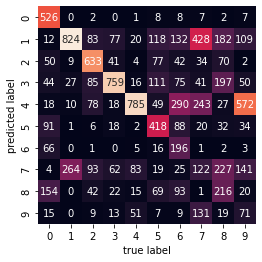

In [64]:
digits, labels = mnist.extract_test()
digits = digits.reshape(-1,28*28)

pred = model.predict(digits)
pred = inverse_one_hot(pred)

res = pred == labels
acc = res[res].sum() / res.shape[0] * 100
acc
plot_confusion_matrix(labels, pred)